In [1]:
# VISUALIZATION NOTEBOOK

# This notebook runs only the visualization of the results of a simulation for the Solar 
# Dynamo model with the sABC algorithm. The results of the simulation, as well as the parameters 
# used for the simulated data and the simulation itself are all stored in files in the directory 
# Simulations/Simulations i, and they are produced by the "simulations.ipynb" notebook.

# NB: The first thing to choose is which simulation to visualize; then it is all automatically done.
# There's no need to modify things, we can simply run the whole code so we know all the parameters
# used and all the graphs that we could be interested in.

# GG EZ - kallo27

In [2]:
# MODEL AND MANAGING FUNCTIONS FILES

include("./model_functions.jl")
include("./managing_functions.jl")
include("./plotting_functions.jl")

using .model_functions
using .managing_functions
using .plotting_functions

In [3]:
# CHOICE OF THE DIRECTORY TO LOAD AND PLOT

# Current directory
initial_dir = pwd()

# Going into "Simulations/Simulation x"
x = 13
switch_dir("Simulation", x)

# NB: Don't run again this cell!!! First go back to the starting directory.

Moved to: /home/ubuntu/LCP_B/Project/Simulations/Simulation 13


In [4]:
# LOADING OF SIMULATED DATA PARAMETERS

sim_param = load_param_sim_data()

7×2 DataFrame
 Row │ Parameter  Value       
     │ String7    String15    
─────┼────────────────────────
   1 │ N          6.2
   2 │ T          3.1
   3 │ tau        3.5
   4 │ sigma      0.04
   5 │ B_max      6.0
   6 │ tspan      [971, 1899]
   7 │ dt         0.1

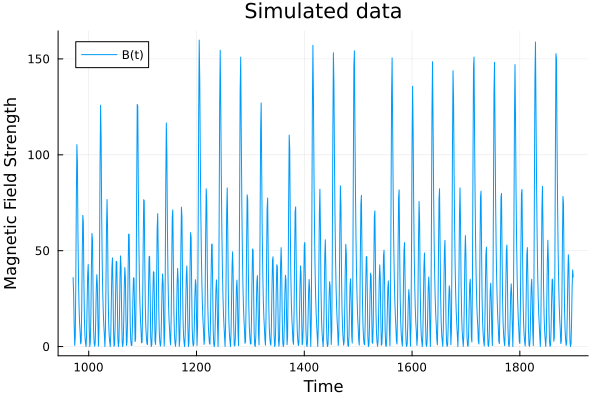

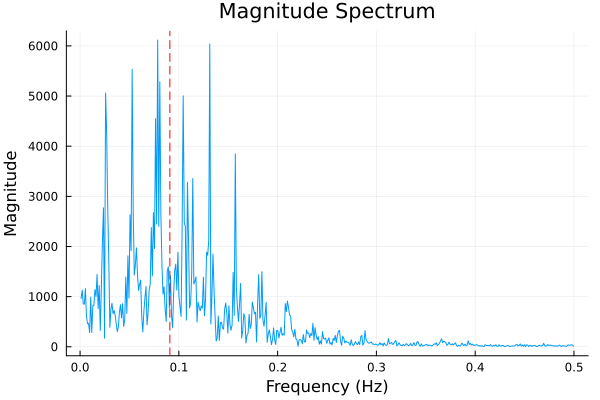

"/home/ubuntu/LCP_B/Project/Simulations/Simulation 13/fourier_spectrum.png"

In [5]:
# VISUALIZATION OF SIMULATED DATA

# Solution of the SDDE
t, u, du = load_solution()

# Fourier spectrum
plot_data(t, u.^2)
plot_fourier_spectrum(t, u.^2)

In [6]:
# LOADING OF SIMULATION PARAMETERS

load_param_sim()

6×2 DataFrame
 Row │ Parameter     Value                             
     │ String15      String                            
─────┼─────────────────────────────────────────────────
   1 │ prior         product_distribution(Uniform(1.0…
   2 │ n_particles   1000
   3 │ n_simulation  5000000
   4 │ v             1.0
   5 │ type          1
   6 │ indices       1:6:115

Data loaded from file: /home/ubuntu/LCP_B/Project/Simulations/Simulation 13/eps_hist.csv
Data loaded from file: /home/ubuntu/LCP_B/Project/Simulations/Simulation 13/u_hist.csv
Data loaded from file: /home/ubuntu/LCP_B/Project/Simulations/Simulation 13/rho_hist.csv
Posterior parameters loaded from file: /home/ubuntu/LCP_B/Project/Simulations/Simulation 13/pop.csv


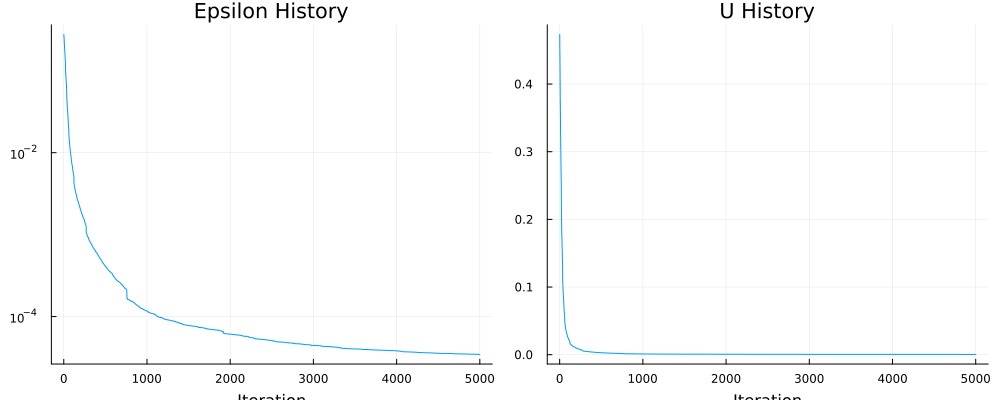

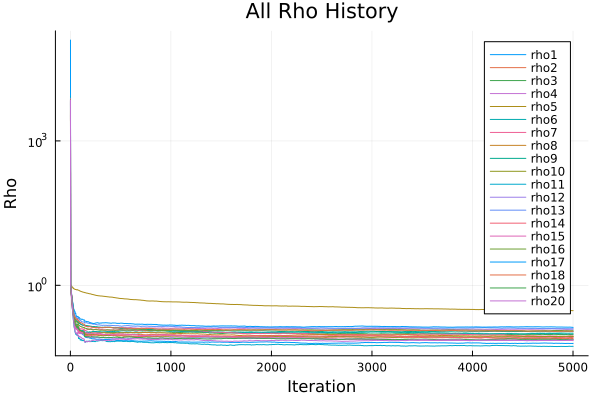

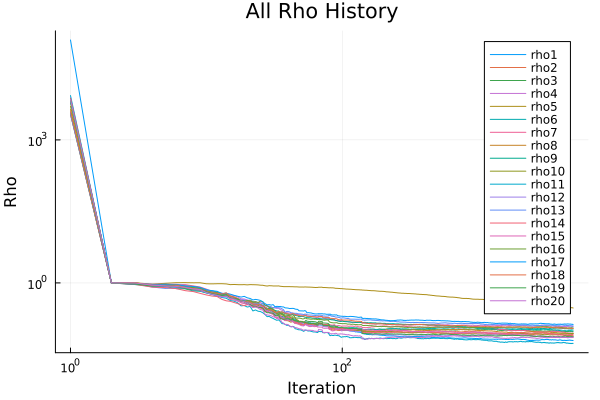

In [7]:
# LOADING AND PLOTTING OF SIMULATION RESULTS AND BEHAVIOUR

# Results loading 
eps_hist, u_hist, rho_hist, posterior_params = load_result()

# Epsilon, u and rho behaviour
u_eps_plot(eps_hist, u_hist)
rho_plot(rho_hist, style = "together")
rho_history(rho_hist)

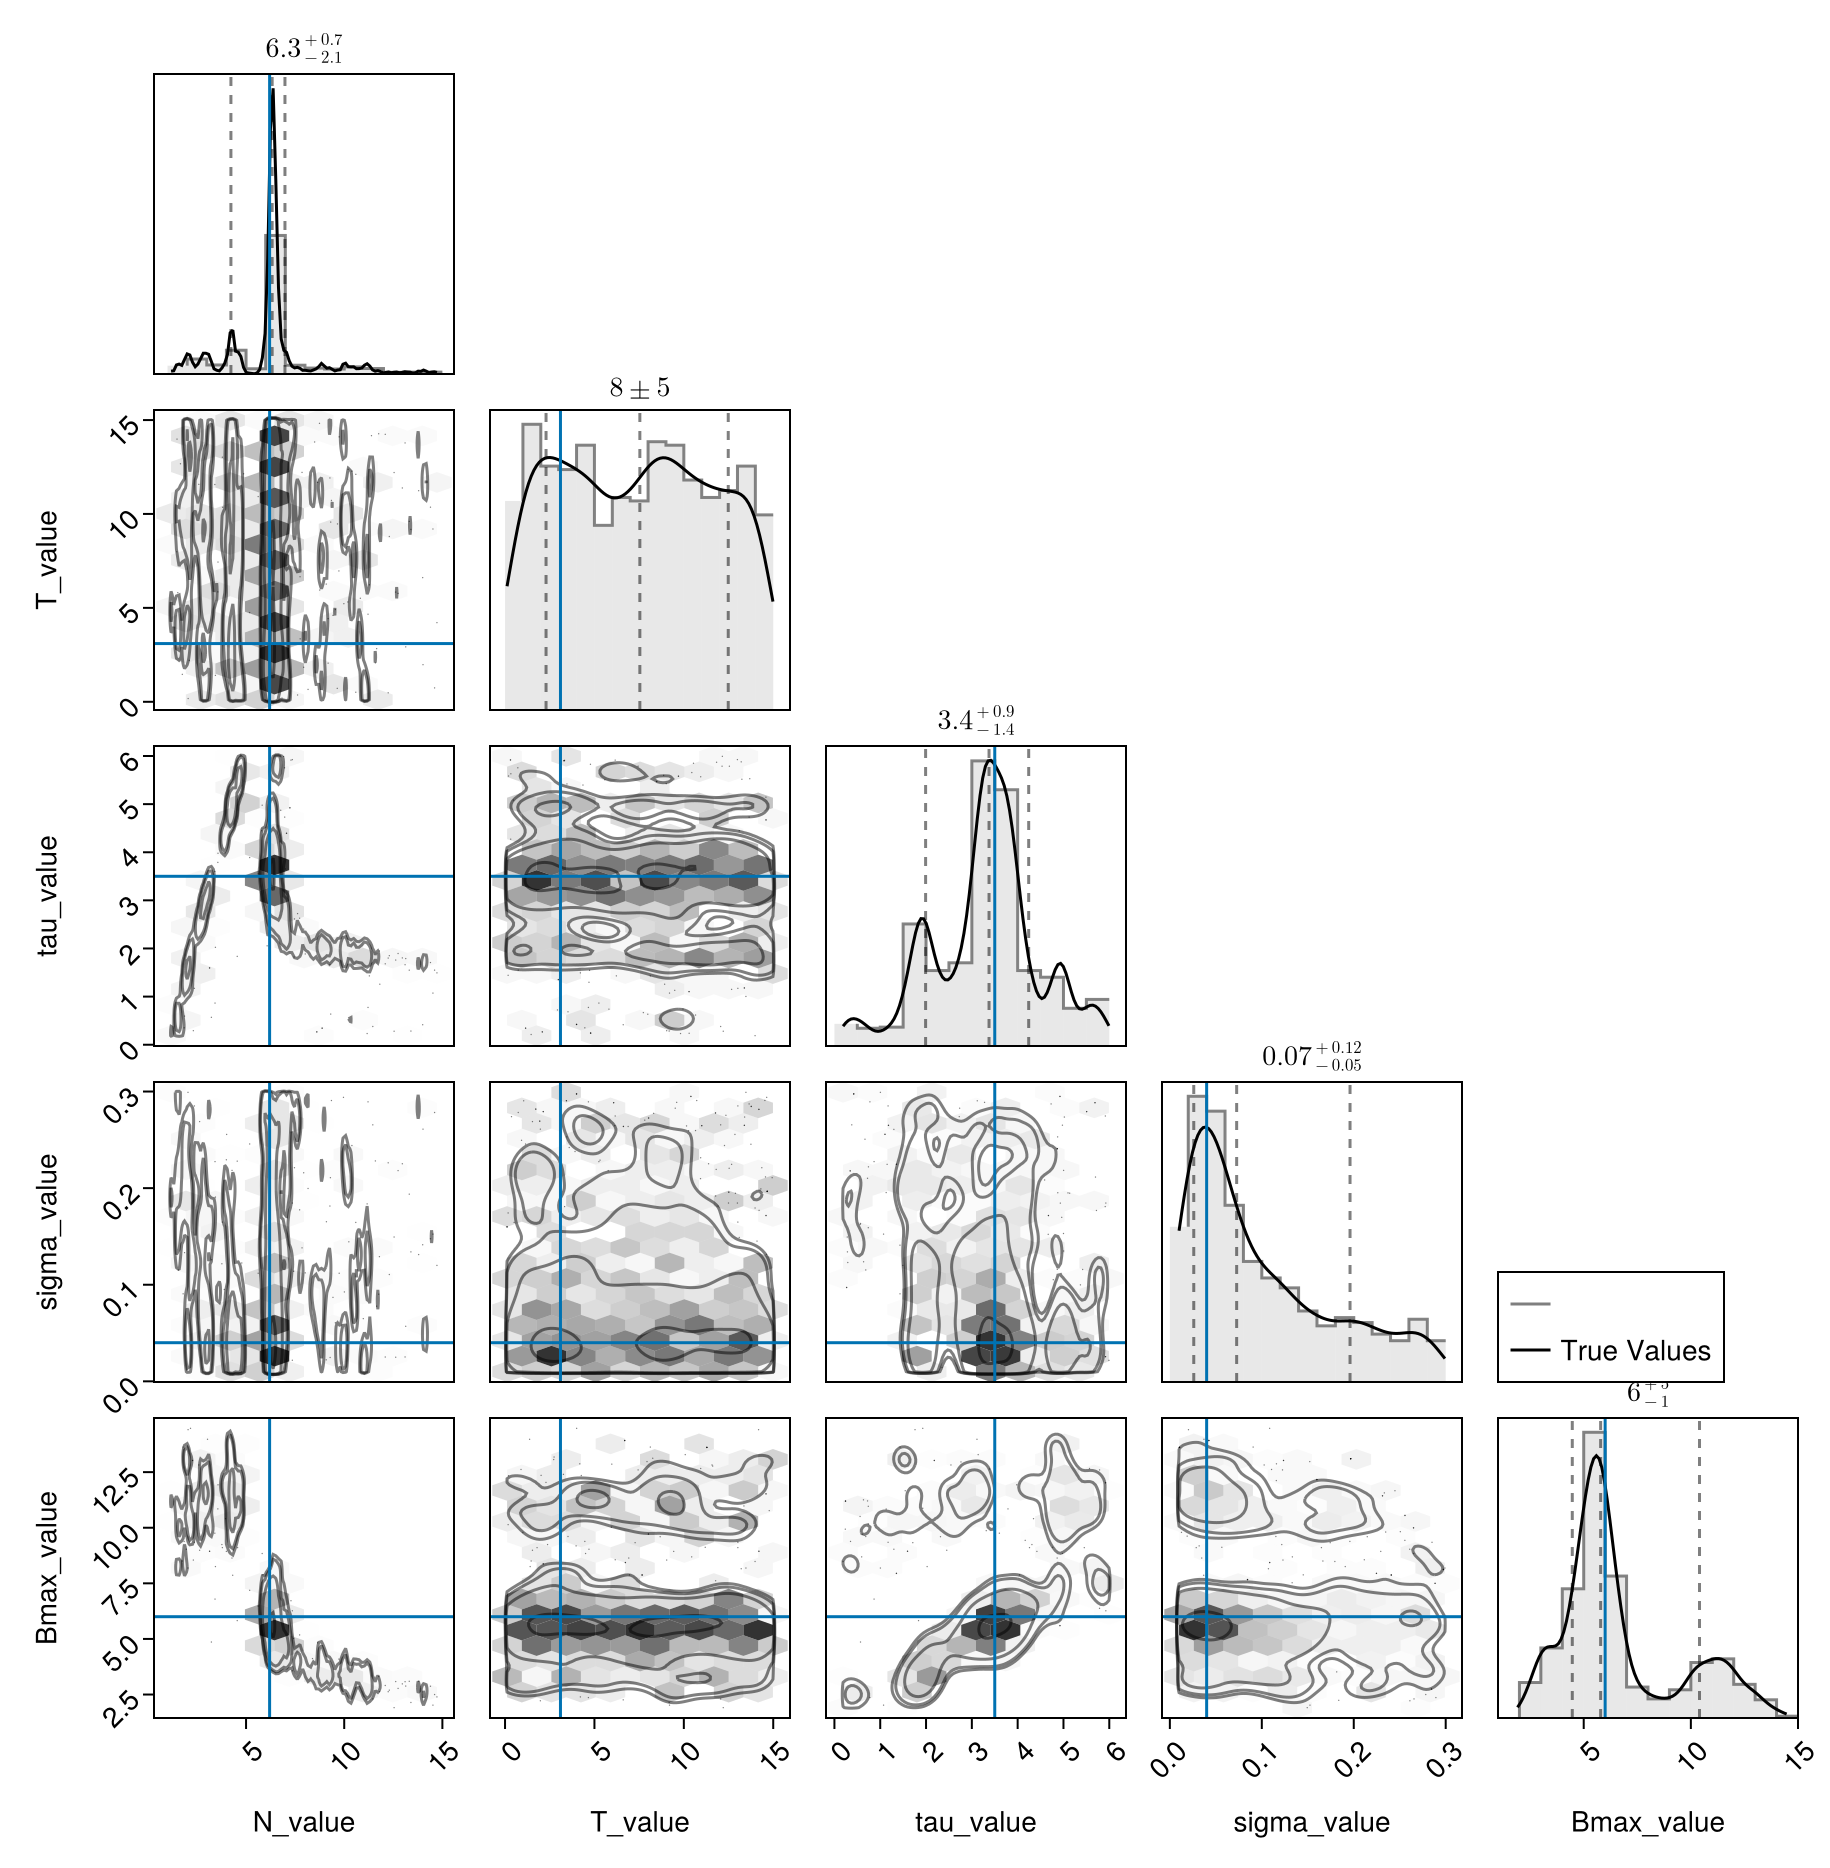

CairoMakie.Screen{IMAGE}


In [8]:
# POSTERIORS PLOTTING

# Retrieving the "true" params used for the simulated data
true_values = [parse(Float64, val) for val in sim_param[1:5, 2]]

# Corner plot
post_plotting_sim(posterior_params, true_values)

In [9]:
# DIRECTORY MANAGING

# WE go back to the initial directory
cd(initial_dir)
pwd()

"/home/ubuntu/LCP_B/Project"